In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sys
plt.style.use('../../style.mplstyle')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['font.size'] = 18

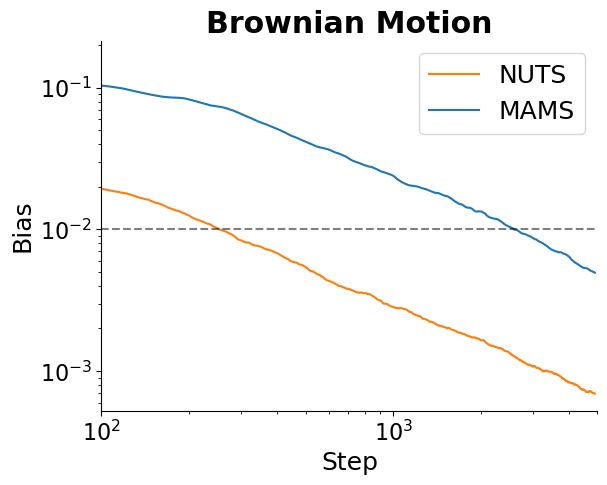

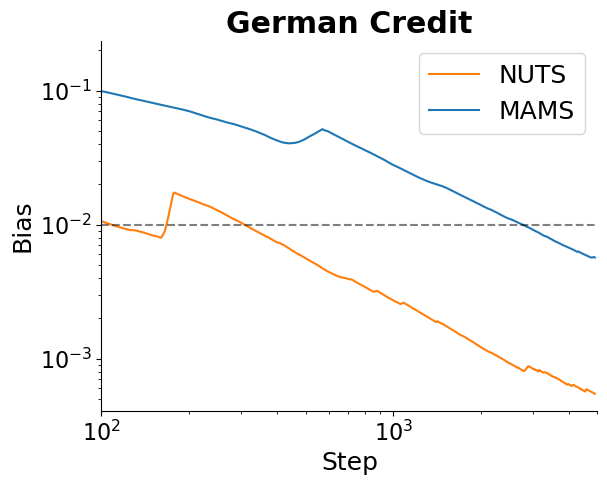

In [ ]:
models= [('vector_brownian_motion_unknown_scales_missing_middle_observations', 'Brownian Motion'),
         ('vector_german_credit_numeric_sparse_logistic_regression', 'German Credit'),
         #('', 'Item Response Theory'),
         #('', 'Stochastic Volatility'),
         ]

plt.figure(figsize = (15, 10))


for i, model in enumerate(models):

    plt.subplot(2, 2, i + 1)
    name, pretty_name = model

    data = np.load('img/' + name + '.npz')
    plt.plot(data['nuts'][100:], label='NUTS', color= 'tab:orange')
    plt.plot(data['mams'][100:], label='MAMS', color= 'tab:blue')
    # make horizontal line at 0.01
    plt.axhline(y=0.01, color='black', linestyle='--', alpha= 0.5)
    if i // 2 != 0:
        plt.xlabel('# samples')
    if i % 2 == 0:
        plt.ylabel(r'$b^2_{\mathrm{max}}$')
    plt.xscale('log')
    plt.yscale('log')
    plt.title(pretty_name, fontweight = 'bold')
    plt.legend()
    plt.xlim(1e2, 5000)
    plt.show()

#plt.savefig('papers/MAMS/img/' + model.name + '.png')
#plt.close()